![Lena Edge](lena_edge.png)

# Détection de Contours

Objectifs :

- Continuer d'apprendre à extraire des caractéristiques plus abstraites sur des images de façon semi-automatique
- S'initier aux notions de traitement de signal numérique

## Partie 1 : recherche d'information

- À quoi sert la méthode de détection de contours en vision par ordinateur ?  
```md
Réduction de dimensions
Détecter les bords en analysant les variations de lumière (d'intensité lumineuse)
```
- Qu'est-ce que le domaine du _traitement du signal_ ?  
```md
Traitement du signal numérique : analyser et traiter des signaux numériques pour les caractériser (e.g. fréquences signal audio, visuel, température...), les représenter
```
- Quels sont les concepts mathématiques associés à la détection de contours ?  
```md
Dérivé, intensité du gradient : pour détecter les changements d'intensité sur l'image 
Filtres = kernel
Opération de convolution
```
- Trouver les noms et formes de filtres très connus pour la détection de contour  
```md
Filtre de Sobel = le plus connu
Filtre de Canny = amélioration de Sobel
Filtre de Prewitt
```

## Partie 2 : extraction de contours

Nous allons utiliser la méthode d'extraction de contours afin d'extraire les caractéristiques d'une image automatiquement.
L'image filtrée deviendra notre nouvelle source de données.

La bibliothèque Pillow implémente l'extraction de contours (et le filtrage numérique en général) via le module
[ImageFilter](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html).

Etapes :

1. Charger et afficher l'image [`lena.jpg`](lena.jpg)
2. Convertir l'image en niveau de gris (8-bit par pixel)
3. Filtrer l'image pour trouver les contours
4. Afficher les 3 images successives

In [48]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy import ndimage
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

### Chargement de l'image

In [3]:
im = Image.open('lena.jpg')

### Conversion en niveau de gris

In [4]:
im_gray = im.convert('L')

### Filtrage de l'image pour détecter les contours

In [112]:
im_filtered = im.filter(ImageFilter.FIND_EDGES)

### Affichage des 3 images successives

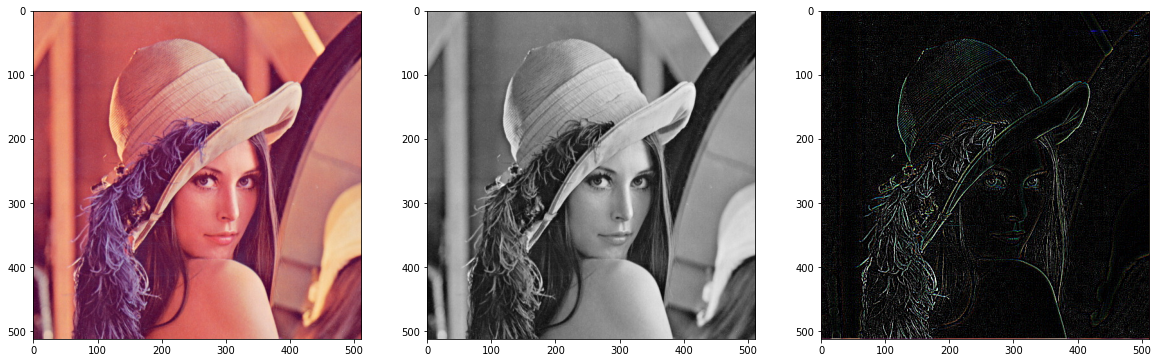

In [113]:
fig = plt.figure(figsize=(20,15))

fig.add_subplot(1,3,1)
plt.imshow(im)

fig.add_subplot(1,3,2)
plt.imshow(im_gray, cmap='gray')

fig.add_subplot(1,3,3)
plt.imshow(im_filtered)

## Partie 3 : filtrage numérique

Afin de comprendre un peu mieux le concept derrière le filtrage numérique,
nous allons implémenter par nous-même un détecteur de contour par un opérateur de _convolution_ !

La bibliothèque SciPy permet d'effectuer cette opération mathématique directement sur des Numpy arrays multi-dimensionnels
grâce à la fonction [`scipy.ndimage.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).

Nous utiliserons [l'opérateur de Sobel](https://en.wikipedia.org/wiki/Sobel_operator) en plusieurs étapes :

1. Charger l'image [`square.png`](square.png)
2. Convertir l'image en niveau de gris (8-bit par pixel)
3. Convertir l'image en Numpy array
4. Effectuer un filtrage par convolution sur l'axe horizontal entre l'image source et le _kernel_ de Sobel horizontal :
$$
G_x = 
\begin{bmatrix}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1 \\
\end{bmatrix}
*
I_{source}
$$

2. Effectuer un filtrage par convolution sur l'axe vertical entre l'image source et le _kernel_ de Sobel vertical :
$$
G_y = 
\begin{bmatrix}
   -1 & -2 & -1 \\
   0 & 0 & 0 \\
   1 & 2 & 1 \\
\end{bmatrix}
*
I_{source}
$$

3. Calculer la combinaison des deux axes pour obtenir l'image filtrée :
$$
G = \sqrt{G_x^2 + G_y^2}
$$

4. Afficher les résultats successifs des 4 images : niveaux de gris, contours horizontaux, contours verticaux, contours globaux

![Convolution Animation](convolution.gif)

### Chargement de l'image

In [10]:
square = Image.open('square.png')

### Conversion en niveaux de gris

In [11]:
square_gray = square.convert('L')

### Conversion en numpy array

In [78]:
square_arr = np.array(square_gray)
square_arr.shape

(231, 231)

### Filtrage par convolution sur l'axe horizontale

In [24]:
sobel_hor = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])

square_filtered_hor = ndimage.convolve(square_arr, sobel_hor)
square_filtered_hor

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Filtrage par convolution sur l'axe vertical

In [25]:
sobel_ver = np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

square_filtered_ver = ndimage.convolve(square_arr, sobel_ver)
square_filtered_ver

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Combinaison des deux filtrages

In [26]:
square_full_filtered = np.sqrt(np.power(square_filtered_hor, 2) + np.power(square_filtered_ver, 2))
square_full_filtered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

### Affichage des 4 images successives

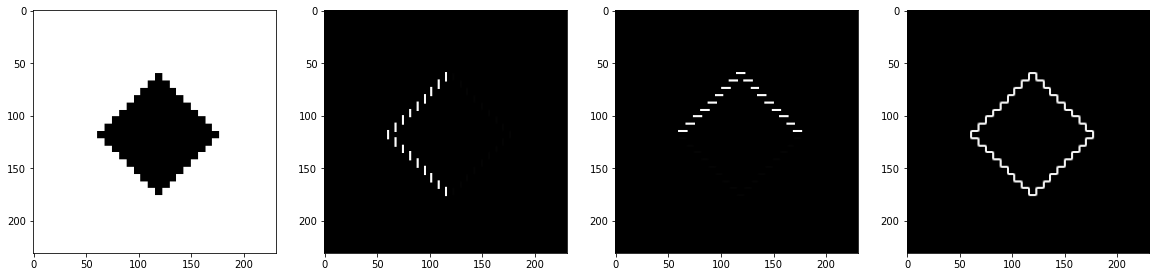

In [28]:
fig = plt.figure(figsize=(20,15))

fig.add_subplot(1,4,1)
plt.imshow(square_gray, cmap='gray')

fig.add_subplot(1,4,2)
plt.imshow(square_filtered_hor, cmap='gray')

fig.add_subplot(1,4,3)
plt.imshow(square_filtered_ver, cmap='gray')

fig.add_subplot(1,4,4)
plt.imshow(square_full_filtered, cmap='gray')

## Partie 4 : extraction de features

Grâce à la méthode de détection de contours, vous avez désormais une nouvelle
méthode d'extraction de features semi-automatique dans votre arsenal !

Appliquer ce concept au jeu de données des digits "MNIST" :

1. Extraire le jeu de données
2. Pré-traiter les images avec la détection de contour pour former les nouvelles features
3. Entrainer et évaluer un classifieur régression logistique
4. Comparer les résultats avec ceux obtenus précédemment

### Extraction jeu de données MNIST

In [30]:
train_mnist = pd.read_csv('mnist_train.csv')
test_mnist = pd.read_csv('mnist_test.csv')

### Filtrage des contours

In [75]:
X_train_edges = np.reshape(train_mnist.drop(columns='label').to_numpy(), (60000, 28, 28))
y_train_edges = train_mnist['label']

X_test_edges = np.reshape(test_mnist.drop(columns='label').to_numpy(), (10000, 28, 28))
y_test_edges = test_mnist['label']

Filtre horizontal

In [77]:
X_train_edges.shape

(60000, 28, 28)

In [81]:
sobel_hor = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])

train_mnist_filtered_hor = []

for image in X_train_edges:
    train_mnist_filtered_hor.append(ndimage.convolve(image, sobel_hor))
    


[array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           -3,  -18,  -15,    0, -108, -118,  -49,  110,    9, -229,  -81,
          128,  247,  127,    0,    0,    0],
        [   0,    0,

In [86]:
sobel_hor = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])

test_mnist_filtered_hor = []

for image in X_test_edges:
    test_mnist_filtered_hor.append(ndimage.convolve(image, sobel_hor))

Filtrage vertical

In [87]:
sobel_ver = np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

train_mnist_filtered_ver = []

for image in X_train_edges:
    train_mnist_filtered_ver.append(ndimage.convolve(image, sobel_ver))

In [88]:
sobel_ver = np.array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

test_mnist_filtered_ver = []

for image in X_test_edges:
    test_mnist_filtered_ver.append(ndimage.convolve(image, sobel_ver))

Combinaison des deux filtres

In [89]:
X_train_mnist_full_filtered = np.sqrt(np.power(train_mnist_filtered_hor, 2) + np.power(train_mnist_filtered_ver, 2))
X_train_mnist_full_filtered

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [90]:
X_test_mnist_full_filtered = np.sqrt(np.power(test_mnist_filtered_hor, 2) + np.power(test_mnist_filtered_ver, 2))
X_test_mnist_full_filtered

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Affichage d'une image

In [93]:
fig = plt.figure(figsize=(20,15))



fig.add_subplot(1,2,1)
plt.imshow(X_test_mnist_full_filtered[1], cmap='gray')
plt.title(y_test_edges[1])

fig.add_subplot(1,2,2)
plt.imshow(X_test_edges[1], cmap='gray')
plt.title(y_test_edges[1])

Text(0.5, 1.0, '2')

### Entraînement et évaluation d'un modèle

Pipeline

In [95]:
pipeline_edges = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(random_state=0, max_iter=10000)),
    ]
)

pipeline_edges.fit(np.reshape(X_train_mnist_full_filtered, (60000,784)), y_train_edges)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=0))])

Prédiction

In [99]:
pred_edges = pipeline_edges.predict(np.reshape(X_test_mnist_full_filtered, (10000,784)))

Matrice de confusion

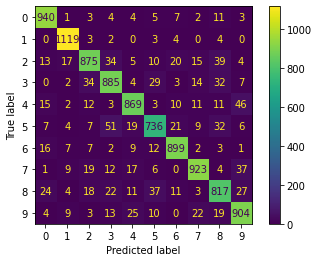

In [100]:
cm_edges = confusion_matrix(y_test_edges, pred_edges)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_edges)
disp.plot()

plt.show()

Métriques

In [101]:
print(classification_report(y_test_edges, pred_edges))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.99      0.97      1135
           2       0.89      0.85      0.87      1032
           3       0.86      0.88      0.87      1010
           4       0.90      0.88      0.89       982
           5       0.86      0.83      0.84       892
           6       0.92      0.94      0.93       958
           7       0.92      0.90      0.91      1028
           8       0.84      0.84      0.84       974
           9       0.87      0.90      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.90     10000



## Partie 5 : features, quand tu nous tiens

1. Après la détection de contours, continuer le pré-traitement avec une réduction de dimension de type PCA pour générer les features finales
2. Entrainer et évaluer un classifieur
3. Comparer les résultats avec ceux obtenus précédemment

Pipeline

In [117]:
pipeline_filtered_pca = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=300)), ('classifier', LogisticRegression(max_iter=10000))])

pipeline_filtered_pca.fit(np.reshape(X_train_mnist_full_filtered, (60000,784)), y_train_edges)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=300)),
                ('classifier', LogisticRegression(max_iter=10000))])

Prédiction

In [118]:
pred_filtered_pca = pipeline_filtered_pca.predict(np.reshape(X_test_mnist_full_filtered, (10000,784)))

Matrice de confusion

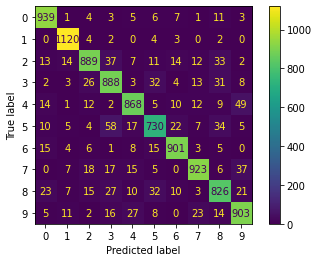

In [119]:
cm_edges_pca = confusion_matrix(y_test_edges, pred_filtered_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_edges_pca)
disp.plot()

plt.show()

Métriques

In [120]:
print(classification_report(y_test_edges, pred_filtered_pca))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.95      0.99      0.97      1135
           2       0.91      0.86      0.88      1032
           3       0.84      0.88      0.86      1010
           4       0.90      0.88      0.89       982
           5       0.86      0.82      0.84       892
           6       0.93      0.94      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.85      0.85      0.85       974
           9       0.88      0.89      0.89      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

